In [42]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import timeit
import random
from google.colab import files

Graph Generation

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 21.  0. 39.]
 ...
 [ 0.  0. 21. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 39. ...  0.  0.  0.]]


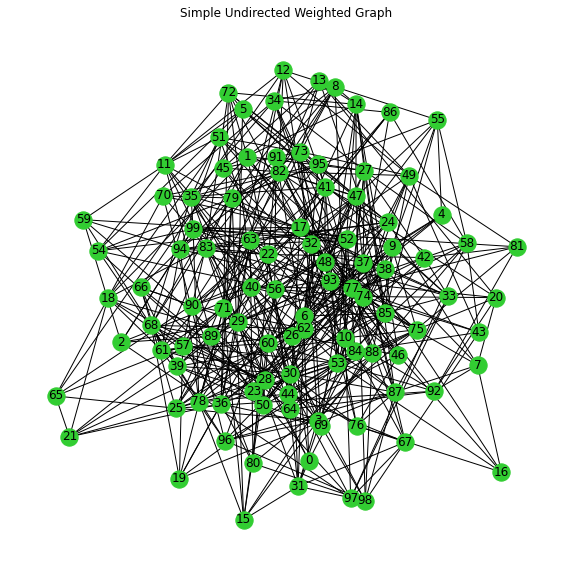

In [2]:
random.seed(2022)

nodes = 100
edges = 500

adj_matrix = np.zeros((nodes, nodes))
n_edge = 0

while n_edge < edges:
    i = np.random.randint(0, nodes)
    j = np.random.randint(0, nodes)
    if adj_matrix[i, j] == 0 and i != j:
        weight = np.random.randint(0, 100)
        adj_matrix[i, j] = weight
        adj_matrix[j, i] = weight
        n_edge += 1

print(adj_matrix)

graph = nx.from_numpy_matrix(adj_matrix)

plt.figure(figsize = (10, 10))
plt.title("Simple Undirected Weighted Graph")
nx.draw(graph, with_labels = True, node_color = "#32cd32")

Dijkstra's & Bellman-Ford Algorithms Functions

In [3]:
def dijkstra_path(graph, source):
    return nx.single_source_dijkstra(
        G = graph,
        source = source
    )

def bellman_ford_path(graph, source):
    return nx.single_source_bellman_ford(
        G = graph,
        source = source
    )

Test-Run of the Algorithms

In [4]:
source = 0

dijkstra_result = dijkstra_path(graph, source)
bellman_ford_result = bellman_ford_path(graph, source)

print("Dijkstra Algorithm\nDistances:", dijkstra_result[0], "\nPaths:", dijkstra_result[1])
print("\n")
print("Bellman-Ford Algorithm\nDistances:", bellman_ford_result[0], "\nPaths:", bellman_ford_result[1])

Dijkstra Algorithm
Distances: {0: 0, 31: 41.0, 24: 43.0, 72: 46.0, 83: 47.0, 28: 47.0, 29: 48.0, 63: 48.0, 26: 51.0, 78: 51.0, 3: 54.0, 85: 56.0, 35: 57.0, 25: 58.0, 46: 60.0, 73: 61.0, 52: 62.0, 54: 62.0, 80: 63.0, 50: 64.0, 6: 64.0, 92: 64.0, 1: 65.0, 95: 65.0, 67: 66.0, 27: 66.0, 55: 67.0, 77: 68.0, 39: 68.0, 21: 69.0, 37: 70.0, 90: 70.0, 94: 70.0, 84: 71.0, 68: 71.0, 56: 72.0, 57: 72.0, 5: 72.0, 16: 73.0, 15: 73.0, 88: 74.0, 41: 74.0, 74: 74.0, 81: 74.0, 79: 75.0, 14: 76.0, 13: 76.0, 18: 76.0, 99: 76.0, 66: 76.0, 59: 76.0, 61: 78.0, 36: 79.0, 30: 79.0, 17: 79.0, 91: 79.0, 33: 79.0, 93: 80.0, 76: 80.0, 20: 80.0, 64: 81.0, 10: 81.0, 44: 82.0, 11: 82.0, 34: 82.0, 9: 84.0, 58: 84.0, 51: 84.0, 87: 84.0, 42: 85.0, 71: 86.0, 82: 86.0, 38: 86.0, 53: 87.0, 65: 87.0, 22: 88.0, 7: 88.0, 12: 89.0, 70: 89.0, 89: 89.0, 19: 89.0, 69: 90.0, 62: 91.0, 47: 91.0, 23: 91.0, 8: 91.0, 97: 92.0, 96: 94.0, 75: 97.0, 32: 98.0, 40: 98.0, 98: 101.0, 43: 102.0, 49: 103.0, 48: 103.0, 60: 103.0, 4: 107.0, 86: 1

Execution Time Measurement

In [5]:
execution_time = pd.DataFrame()

for i in range(0, 10):
    execution_time.loc[i, "dijkstra_algorithm"] = timeit.timeit(
        "dijkstra_path(graph, source)",
        setup = "from __main__ import dijkstra_path, graph, source",
        number = 1
    )
    
    execution_time.loc[i, "bellman_ford_algorithm"] = timeit.timeit(
        "bellman_ford_path(graph, source)",
        setup = "from __main__ import bellman_ford_path, graph, source",
        number = 1
    )

print(execution_time)
print("\nAverage Execution Time")
execution_time.mean()

   dijkstra_algorithm  bellman_ford_algorithm
0            0.001691                0.005817
1            0.001635                0.005094
2            0.007133                0.005223
3            0.001581                0.004685
4            0.001468                0.005045
5            0.001516                0.010600
6            0.001532                0.016417
7            0.001541                0.004201
8            0.000950                0.004610
9            0.001528                0.004967

Average Execution Time


dijkstra_algorithm        0.002058
bellman_ford_algorithm    0.006666
dtype: float64

Cell Grid Generation

In [59]:
graph = nx.generators.lattice.grid_2d_graph(10, 20)
obstacles_indices = random.sample(range(0, 200), 40)
obstacles = list()

for i in obstacles_indices:
  obstacles.append(list(graph.nodes())[i])

graph.remove_nodes_from(obstacles)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

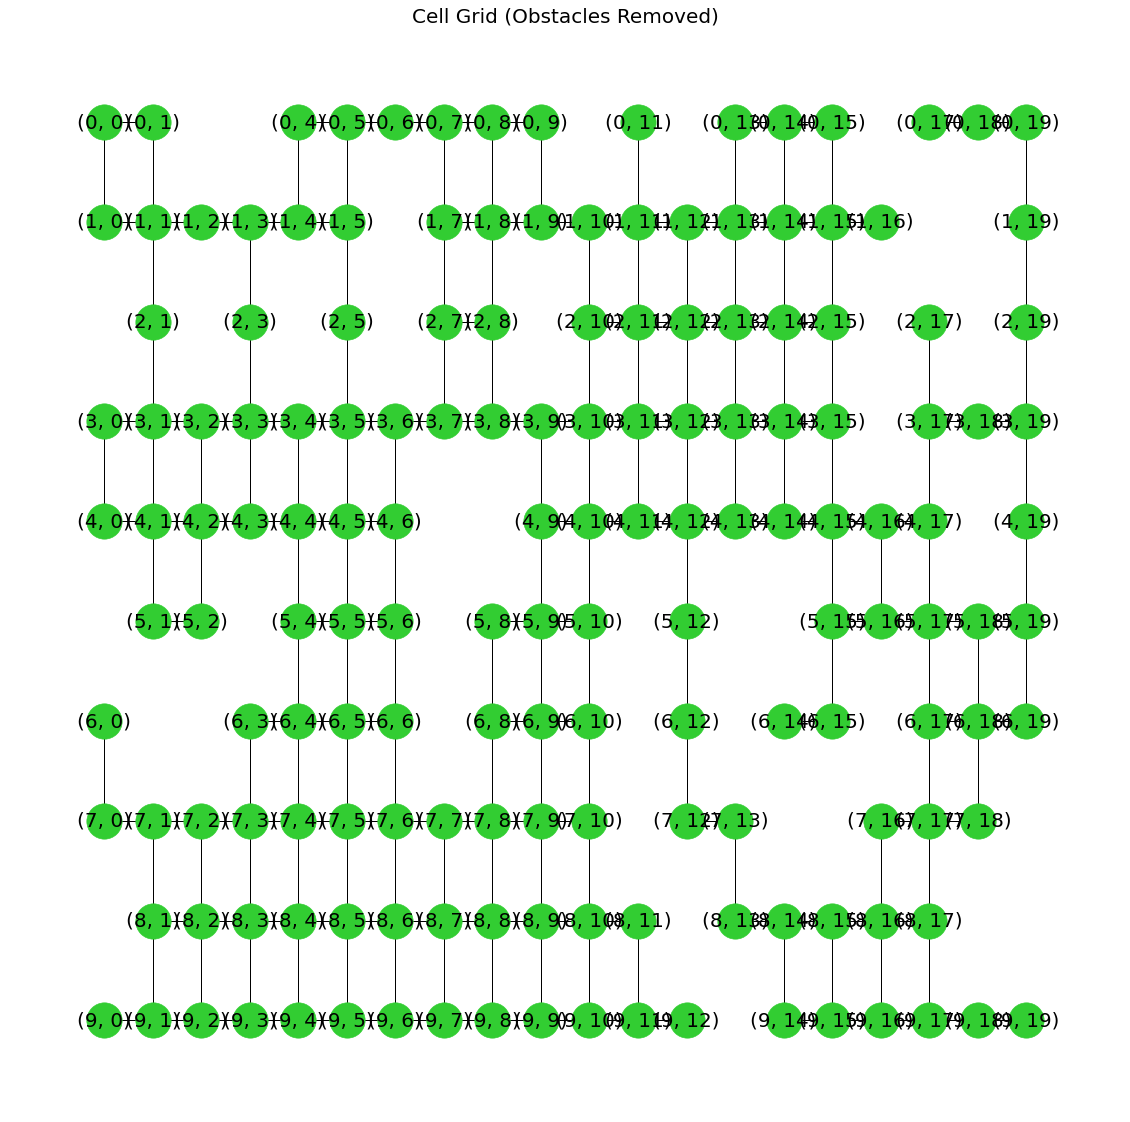

In [80]:
pos = {(i, j): (j, -i) for i, j in graph.nodes()}

plt.figure(figsize = (20, 20))
plt.title("Cell Grid (Obstacles Removed)", fontsize=20)
nx.draw(graph, pos,
        with_labels = True,
        node_size = 1250,
        font_size = 20,
        node_color = "#32CD32",
        linewidths = 0.6)

plt.savefig("cell_grid.png", dpi = 200, bbox_inches = "tight")
files.download("cell_grid.png")

In [62]:
def heuristic(x, y):
    (i1, j1) = x
    (i2, j2) = y
    return np.power((np.power((i1 - i2), 2) + np.power((j1 - j2), 2)), 0.5)

A* Algorithm Function

In [87]:
def astar_path(graph, source, target, dist):
    return nx.astar_path(
        G = graph,
        source = source,
        target = target,
        heuristic = dist
    )

def astar_iter(graph_nodes, graph, iter, d):
  source, target = random.choice(graph_nodes), random.choice(graph_nodes)
  path = astar_path(graph, source, target, d)
  node_colors = ["#EE9B01" if n in path else "#32CD32" for n in graph.nodes()]

  pos = {(x, y): (y, -x) for x, y in graph.nodes()}

  if iter != "None":
    nx.draw(graph, pos,
        ax = ax[iter],
        with_labels=True,
        node_size = 600, 
        font_size = 10,
        node_color = node_colors,
        linewidths = 0.4)
  else:
    nx.draw(graph, pos, 
        with_labels = True,
        node_size = 2000, 
        font_size = 20,
        node_color = node_colors,
        linewidths = 0.4)

Test-Run for A* Algorithm

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

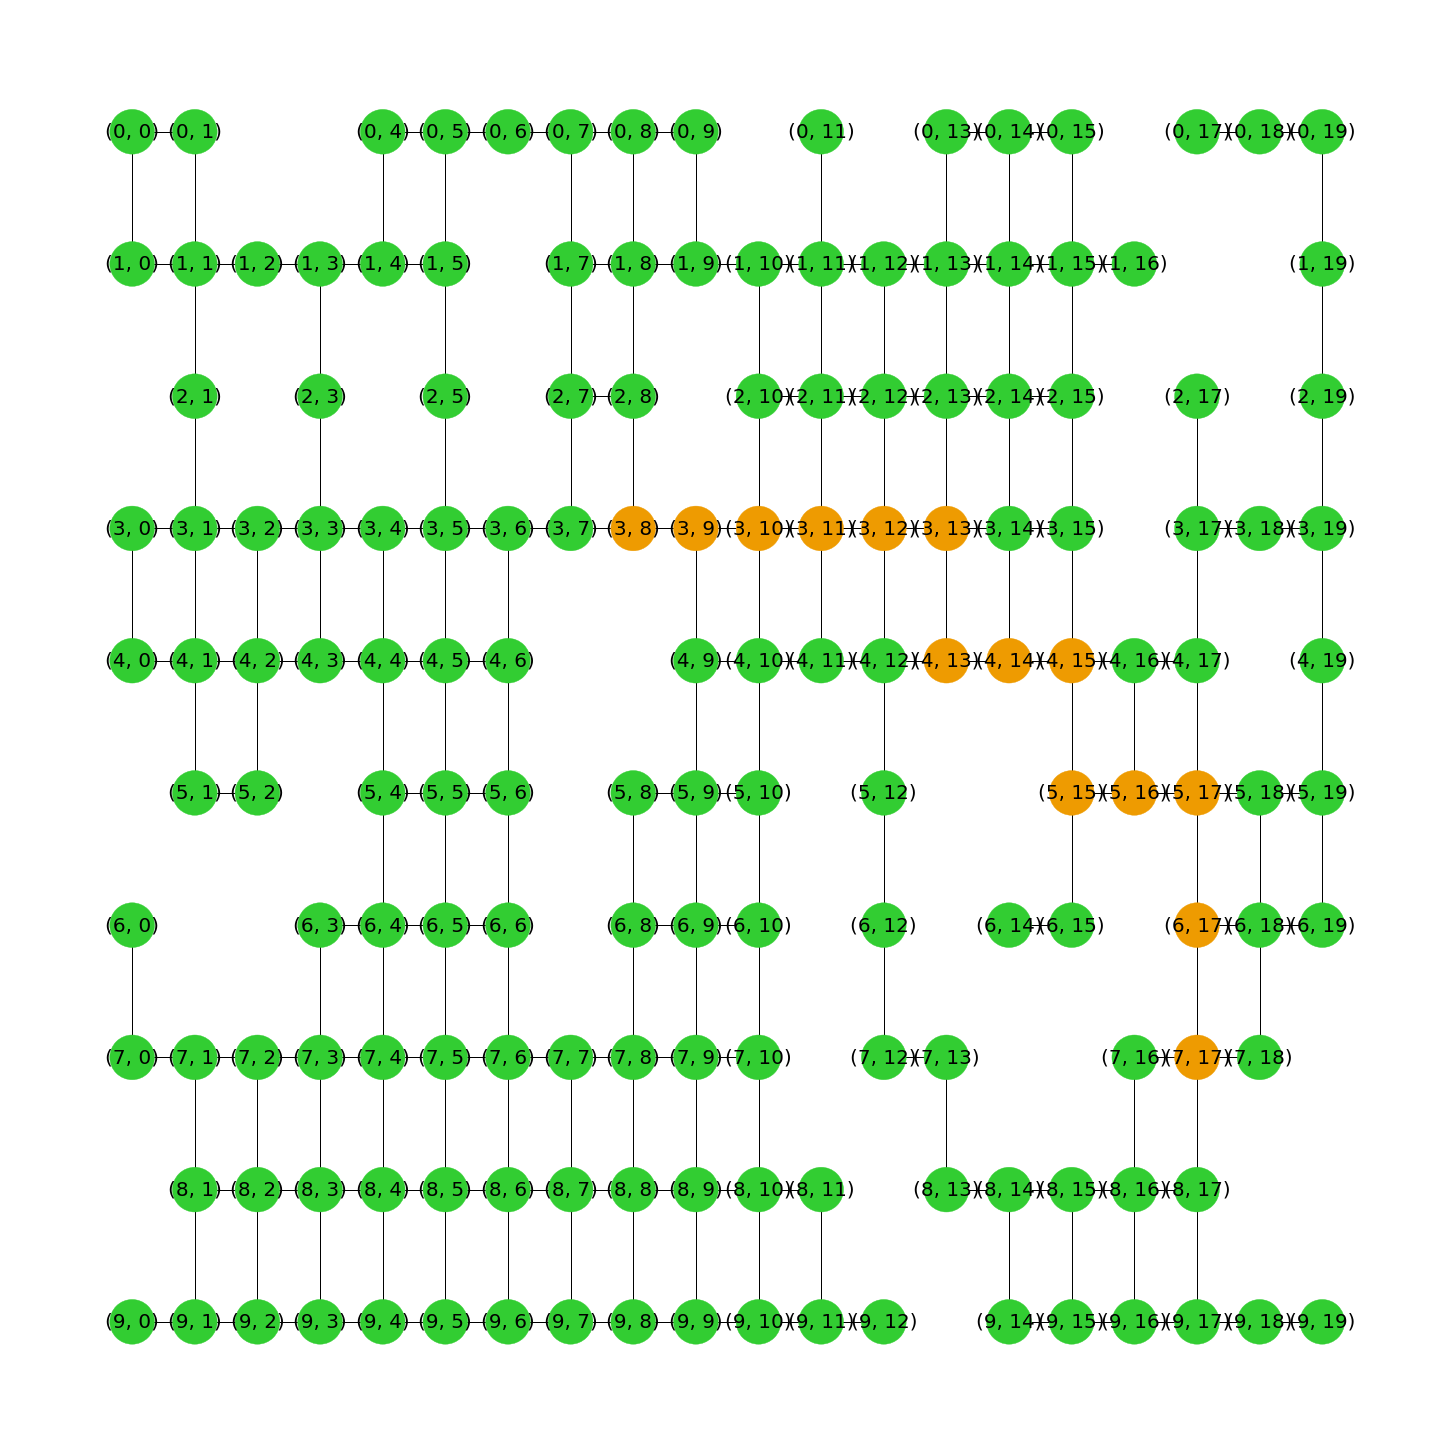

In [86]:
graph_nodes = list(graph.nodes)
plt.figure(figsize = (20, 20))
astar_iter(graph_nodes, graph, "None", heuristic)

plt.savefig("a_star_first.png", dpi = 200, bbox_inches = "tight")
files.download("a_star_first.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

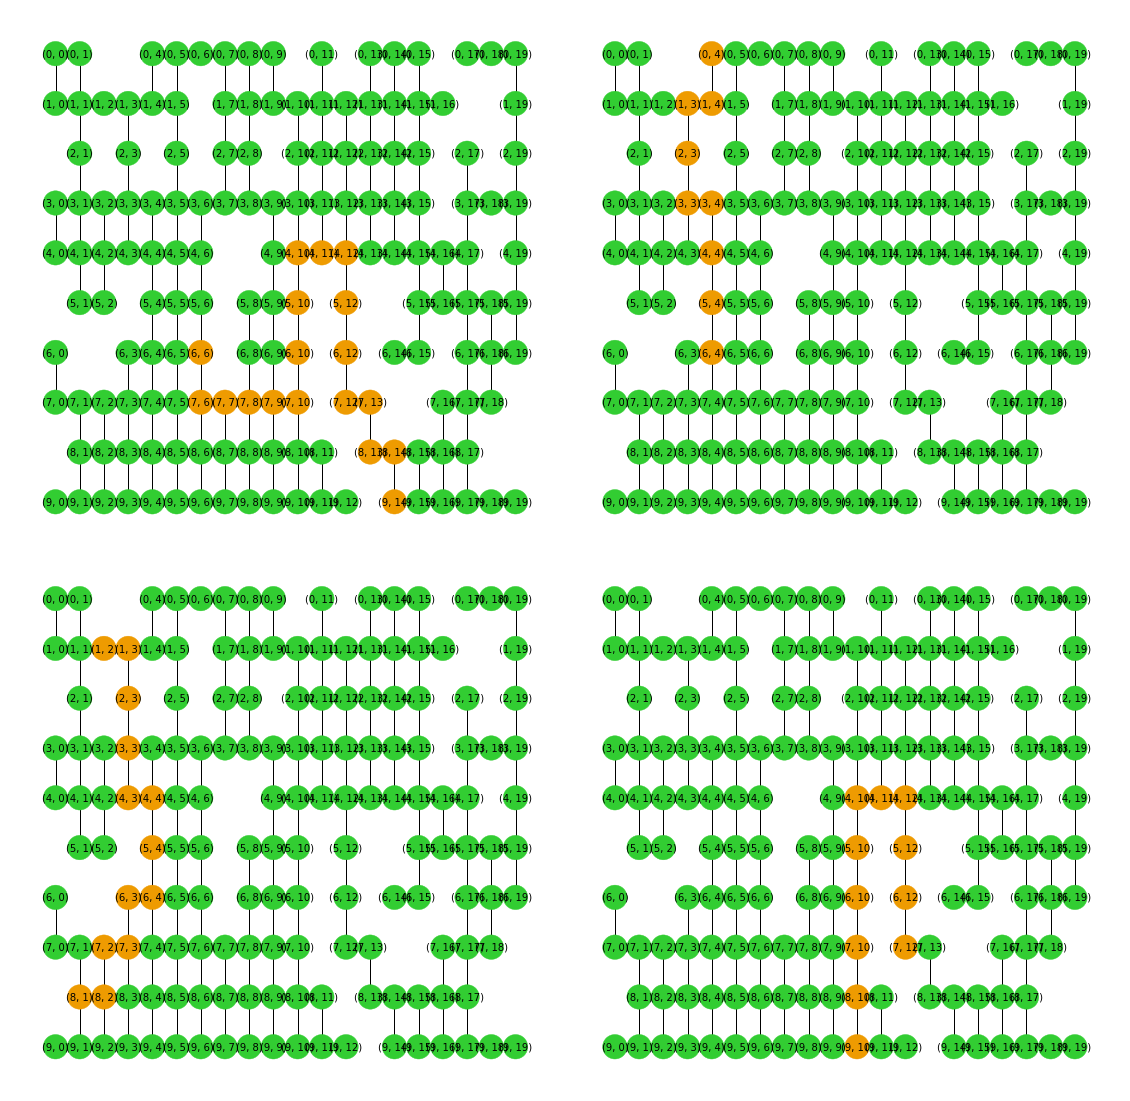

In [88]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20))
ax = ax.flatten()
plt.subplots_adjust(hspace = 0.005, wspace = 0.005)

for i in range(4):
  astar_iter(graph_nodes, graph, i, heuristic)

plt.savefig("a_star_other.png", dpi = 200, bbox_inches = "tight")
files.download("a_star_other.png")